# Loi de Benford et données d'abondance de protéines
Ce script a pour but de vérifier si l'abondance de protéines, d'un fichier d'abondance de protéines extrait depuis [PRIDE](https://www.ebi.ac.uk/pride/), suit la loi de Benford.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.insert(0, '..')

import benford

%load_ext autoreload
%autoreload 2

## Téléchargement du jeu de données

In [2]:
if not os.path.exists("1445007-Cglabrata-QUANTI.csv"):
    !wget http://ftp.pride.ebi.ac.uk/pride/data/archive/2019/07/PXD014125/1445007-Cglabrata-QUANTI.csv

## Chargement et exploration du jeu de données 

In [3]:
data = pd.read_csv("1445007-Cglabrata-QUANTI.csv", skiprows=2)

In [4]:
data.shape

(1936, 45)

In [5]:
data.head()

,Accession,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,Highest mean condition,Lowest mean condition,Description,1445007-Q1,...,1445007-Q2.2,1445007-Q8.2,1445007-Q3.2,1445007-Q9.2,1445007-Q4.2,1445007-Q10.2,1445007-Q5.2,1445007-Q11.2,1445007-Q6.2,1445007-Q12.2
0,GLV|CAGL0M05929g,1,1,97.80,5.719966e-10,inf,C10 Tris1,C10 Tris2,[Candida glabrata] CAGL-CDS4552.1 CAGL-IPF9088...,5.396072e+04,...,2,3,0,0,2,2,1,2,0,0
1,GLV|CAGL0A03993g,1,1,23.86,2.928500e-09,inf,C10 Tris1,C10 Tris2,[Candida glabrata] CAGL-CDS4296.1 CAGL-IPF1185...,3.333623e+04,...,1,0,0,0,0,0,0,0,0,0
2,GLV|CAGL0D00176g,40,40,3688.17,5.788833e-09,4.900036,C60,C60 Tris2,[Candida glabrata] CAGL-CDS2317.1 CAGL-IPF2549...,1.005912e+08,...,71,106,3,2,112,119,49,45,22,39
3,GLV|CAGL0I03498g,1,1,17.60,1.688998e-08,inf,C60,C10 Tris2,[Candida glabrata] CAGL-CDS2392.1 CAGL-IPF7370...,1.282680e+05,...,0,0,0,0,0,0,0,0,0,0
4,GLV|CAGL0C02475g,1,1,89.39,1.753395e-08,inf,C60 Tris2,C10,[Candida glabrata] CAGL-CDS4848.1 CAGL-IPF1048...,0.000000e+00,...,0,1,0,0,1,1,1,1,1,1


In [6]:
data.columns

Index(['Accession', 'Peptide count', 'Unique peptides', 'Confidence score',
       'Anova (p)', 'Max fold change', 'Highest mean condition',
       'Lowest mean condition', 'Description', '1445007-Q1', '1445007-Q7',
       '1445007-Q2', '1445007-Q8', '1445007-Q3', '1445007-Q9', '1445007-Q4',
       '1445007-Q10', '1445007-Q5', '1445007-Q11', '1445007-Q6', '1445007-Q12',
       '1445007-Q1.1', '1445007-Q7.1', '1445007-Q2.1', '1445007-Q8.1',
       '1445007-Q3.1', '1445007-Q9.1', '1445007-Q4.1', '1445007-Q10.1',
       '1445007-Q5.1', '1445007-Q11.1', '1445007-Q6.1', '1445007-Q12.1',
       '1445007-Q1.2', '1445007-Q7.2', '1445007-Q2.2', '1445007-Q8.2',
       '1445007-Q3.2', '1445007-Q9.2', '1445007-Q4.2', '1445007-Q10.2',
       '1445007-Q5.2', '1445007-Q11.2', '1445007-Q6.2', '1445007-Q12.2'],
      dtype='object')

In [7]:
normalized_columns = ['1445007-Q1', '1445007-Q7','1445007-Q2', '1445007-Q8',
                      '1445007-Q3', '1445007-Q9', '1445007-Q4', '1445007-Q10',
                      '1445007-Q5', '1445007-Q11', '1445007-Q6', '1445007-Q12']

raw_columns = ['1445007-Q1.1', '1445007-Q7.1', '1445007-Q2.1', '1445007-Q8.1',
               '1445007-Q3.1', '1445007-Q9.1', '1445007-Q4.1', '1445007-Q10.1',
               '1445007-Q5.1', '1445007-Q11.1', '1445007-Q6.1', '1445007-Q12.1']

In [8]:
data.describe()

,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,1445007-Q1,1445007-Q7,1445007-Q2,1445007-Q8,1445007-Q3,...,1445007-Q2.2,1445007-Q8.2,1445007-Q3.2,1445007-Q9.2,1445007-Q4.2,1445007-Q10.2,1445007-Q5.2,1445007-Q11.2,1445007-Q6.2,1445007-Q12.2
count,1936.00000,1936.000000,1936.000000,1.930000e+03,1930.000000,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,...,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000
mean,6.49845,6.306302,359.394995,2.448946e-01,inf,4.751254e+06,5.366972e+06,5.065718e+06,5.197891e+06,3.488360e+06,...,3.955579,5.697831,0.380165,0.261880,6.269112,6.209711,6.110537,6.348140,3.289773,5.634814
std,7.46326,7.227258,518.734163,2.883287e-01,NaN,2.996800e+07,3.375564e+07,2.411415e+07,2.663158e+07,1.395122e+07,...,8.359808,11.631425,1.391409,1.050219,12.642956,12.553160,10.671567,11.323739,5.567738,9.568165
min,1.00000,0.000000,15.030000,5.719966e-10,1.130936,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,2.000000,57.337500,1.109649e-02,2.893868,2.514680e+04,3.131115e+04,4.576720e+04,5.282857e+04,7.379701e+03,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,4.00000,4.000000,161.510000,1.046004e-01,4.958960,1.291918e+05,1.667075e+05,2.219138e+05,2.219337e+05,1.162979e+05,...,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
75%,8.00000,8.000000,422.527500,4.252954e-01,16.073054,8.653429e+05,1.040062e+06,1.304688e+06,1.263389e+06,8.788029e+05,...,4.000000,5.000000,0.000000,0.000000,6.000000,6.000000,7.000000,7.000000,4.000000,6.000000
max,60.00000,60.000000,4483.410000,9.990362e-01,inf,7.895782e+08,9.083549e+08,4.857986e+08,5.773365e+08,2.357977e+08,...,97.000000,135.000000,20.000000,14.000000,157.000000,150.000000,135.000000,141.000000,68.000000,110.000000


## Récupération des abondances nomalisées

In [9]:
norm_abundance = data[normalized_columns]
print(norm_abundance.shape)
norm_abundance.head()

(1936, 12)


,1445007-Q1,1445007-Q7,1445007-Q2,1445007-Q8,1445007-Q3,1445007-Q9,1445007-Q4,1445007-Q10,1445007-Q5,1445007-Q11,1445007-Q6,1445007-Q12
0,5.396072e+04,7.607179e+04,8.297770e+04,7.549802e+04,0.000000e+00,0.000000e+00,6.773552e+04,8.529264e+04,5.459649e+04,4.972176e+04,3.427736e+04,3.055065e+04
1,3.333623e+04,3.300214e+04,1.706845e+05,1.774815e+05,0.000000e+00,0.000000e+00,8.068690e+04,1.124522e+05,1.177198e+05,1.318751e+05,1.531653e+05,9.220770e+04
2,1.005912e+08,1.011114e+08,7.927298e+07,7.911240e+07,2.755520e+07,2.963698e+07,1.210886e+08,1.243634e+08,2.597128e+07,2.526855e+07,2.427973e+07,2.581216e+07
3,1.282680e+05,9.384290e+04,1.003959e+05,9.644244e+04,0.000000e+00,0.000000e+00,1.249602e+05,1.158255e+05,8.551896e+04,1.048047e+05,5.834601e+04,1.213847e+05
4,0.000000e+00,0.000000e+00,3.132250e+04,5.475254e+04,0.000000e+00,0.000000e+00,1.856952e+04,1.855994e+04,6.257094e+04,7.835615e+04,1.351767e+05,6.157735e+04


In [10]:
# données dans un array d'une dimmenssion
norm_abundance = norm_abundance.values.reshape(norm_abundance.shape[0] * norm_abundance.shape[1])
print(norm_abundance.shape)
norm_abundance

(23232,)


array([53960.72435433, 76071.79246109, 82977.70221731, ...,
                  nan,            nan,            nan])

In [11]:
# remove 0
norm_abundance = norm_abundance[norm_abundance > 0]
print(norm_abundance.shape)

(22411,)


## Récupération des abondances non normalisées

In [12]:
raw_abundance = data[raw_columns]
print(raw_abundance.shape)
raw_abundance.head()

(1936, 12)


,1445007-Q1.1,1445007-Q7.1,1445007-Q2.1,1445007-Q8.1,1445007-Q3.1,1445007-Q9.1,1445007-Q4.1,1445007-Q10.1,1445007-Q5.1,1445007-Q11.1,1445007-Q6.1,1445007-Q12.1
0,3.630108e+04,4.038520e+04,4.614436e+04,7.711143e+04,0.000000e+00,0.000000,6.773552e+04,8.709263e+04,6.771089e+04,6.248702e+04,1.384783e+04,3.341036e+04
1,2.242633e+04,1.752027e+04,9.491859e+04,1.812743e+05,0.000000e+00,0.000000,8.068690e+04,1.148254e+05,1.459967e+05,1.657319e+05,6.187778e+04,1.008388e+05
2,6.767087e+07,5.367831e+07,4.408415e+07,8.080305e+07,1.369881e+06,576411.311211,1.210886e+08,1.269880e+08,3.220974e+07,3.175585e+07,9.808853e+06,2.822832e+07
3,8.628990e+04,4.981957e+04,5.583073e+04,9.850344e+04,0.000000e+00,0.000000,1.249602e+05,1.182698e+05,1.060611e+05,1.317116e+05,2.357141e+04,1.327469e+05
4,0.000000e+00,0.000000e+00,1.741862e+04,5.592262e+04,0.000000e+00,0.000000,1.856952e+04,1.895163e+04,7.760084e+04,9.847283e+04,5.461053e+04,6.734132e+04


In [13]:
# données dans un array d'une dimmenssion
raw_abundance = raw_abundance.values.reshape(raw_abundance.shape[0] * raw_abundance.shape[1])
print(raw_abundance.shape)
raw_abundance

(23232,)


array([36301.07929739, 40385.19808956, 46144.36454181, ...,
           0.        ,     0.        ,     0.        ])

In [14]:
raw_abundance = raw_abundance[raw_abundance > 0]
print(raw_abundance.shape)

(22411,)


## Analyse sur les données d'abondance normalisées
### histograme de la distribution des données normalisées

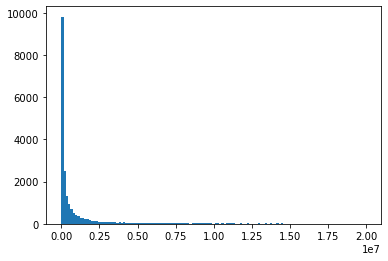

In [15]:
plt.hist(norm_abundance, bins=range(0, 20_000_000, 150_000));

### Analyse des $1^{er}$ digit

In [16]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(norm_abundance)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

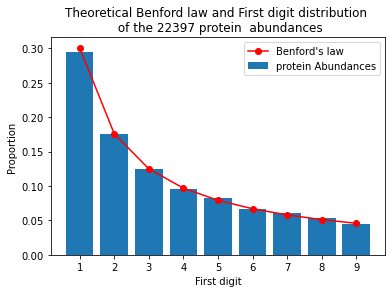

In [17]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances")

### Test statistique par la procédure "bootstrap"

In [18]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(norm_abundance, f_benford, nb_digit=1)

statistics : 8.188187281914812 ; p-value : 0.415306810854963 ; number of significant tests : 59
CPU times: user 3.52 s, sys: 0 ns, total: 3.52 s
Wall time: 3.51 s


In [19]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [20]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(norm_abundance, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

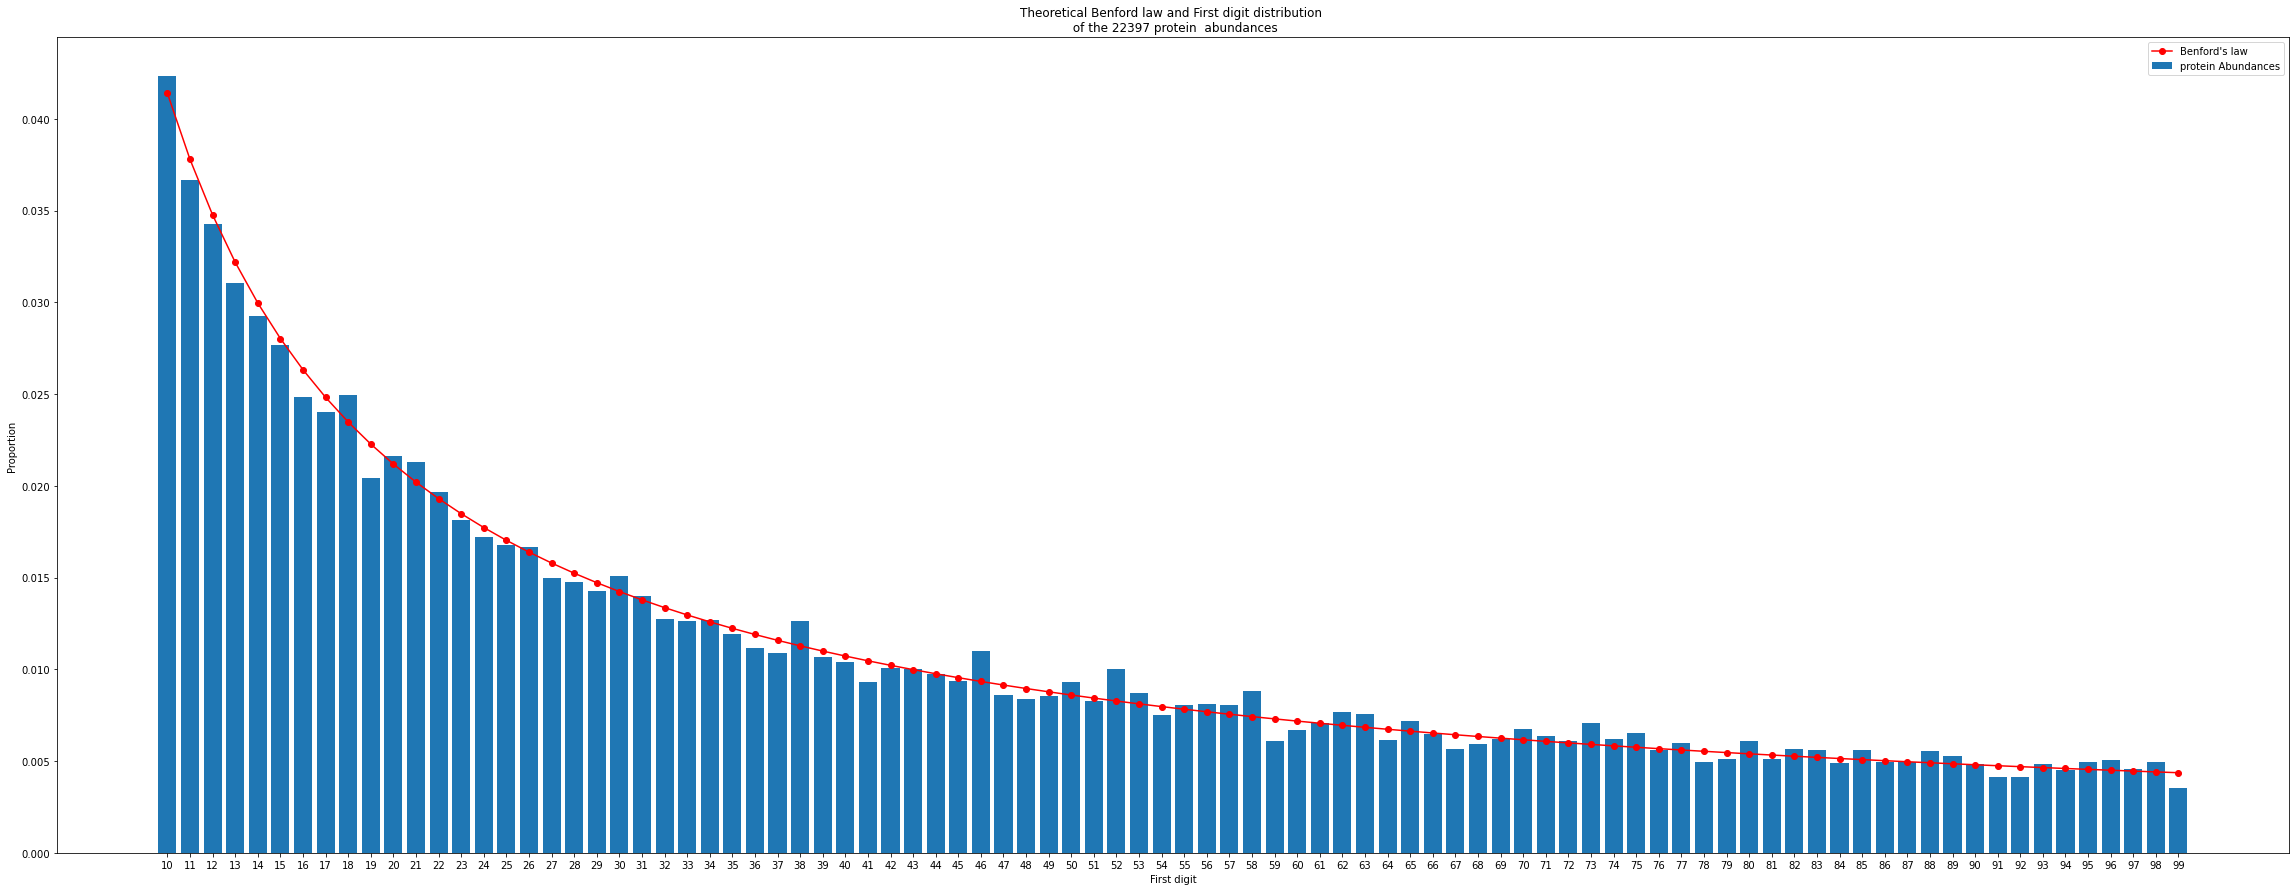

In [21]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [22]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(norm_abundance, f_benford, nb_digit=2)

statistics : 90.38608137009787 ; p-value : 0.43908564039415643 ; number of significant tests : 68
CPU times: user 3.83 s, sys: 0 ns, total: 3.83 s
Wall time: 3.83 s


In [23]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.


## Analyse sur les données d'abondance non normalisées
### histograme de la distribution des données non normalisées

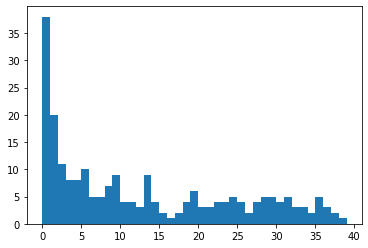

In [24]:
plt.hist(raw_abundance, bins=range(0, 40));

### Analyse des $1^{er}$ digit

In [25]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(raw_abundance)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

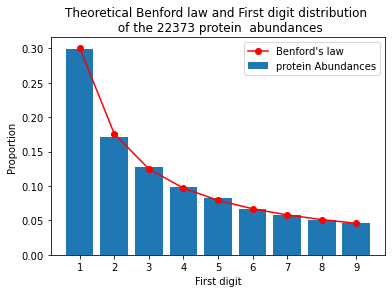

In [26]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances")

### Test statistique par la procédure "bootstrap"

In [27]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(raw_abundance, f_benford, nb_digit=1)

statistics : 8.019951320876869 ; p-value : 0.43152364159587064 ; number of significant tests : 47
CPU times: user 3.72 s, sys: 3.77 ms, total: 3.73 s
Wall time: 3.72 s


In [28]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [29]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(raw_abundance, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

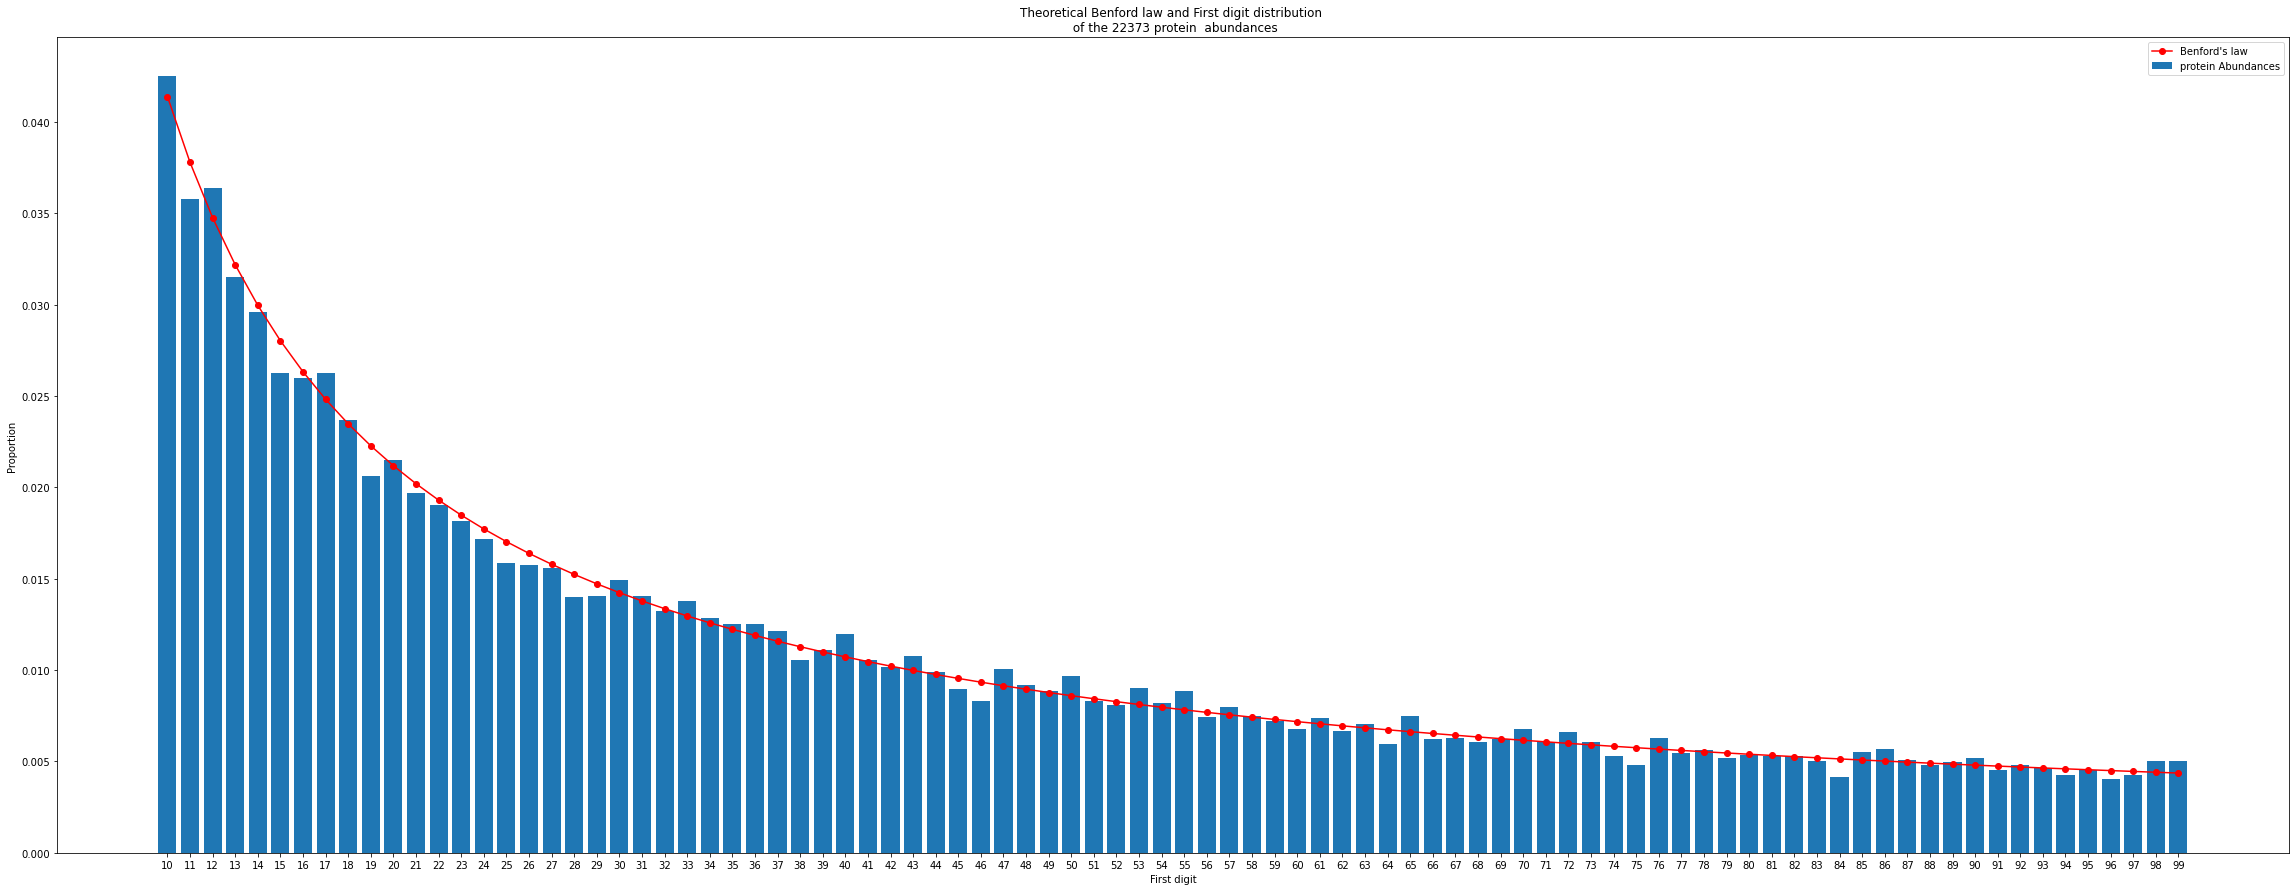

In [30]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [31]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(raw_abundance, f_benford, nb_digit=2)

statistics : 89.0223251357167 ; p-value : 0.4793967446495727 ; number of significant tests : 50
CPU times: user 3.82 s, sys: 3.79 ms, total: 3.82 s
Wall time: 3.82 s


In [32]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.
